# Lisa Cohen

MCP210C take-home final exam, Dr. Calvert

June 1, 2016

In [11]:
# DRAFT - NOT FINISHED YET

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# What is the cost of consuming/metabolizing ethanol? 
***1.  Ethanol is metabolized as follows: The first step is catalyzed by the enzyme alcohol dehydrogenase (ADH) (EC 1.1.1.1) while the second step is catalyzed by aldehyde dehydrogenase (ALDH) (EC 1.2.1.3).  In the mitochondria, the acetate is converted to acetyl CoA by acetyl CoA (EC 6.2.1.1).  You know what happens to acetyl CoA if it is oxidized.***  

Step 1:
ethanol + NAD+ -> acetaldehyde + NADH + H+
[alcohol dehydrogenase (ADH) (EC 1.1.1.1)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00003&reactantsCoeff=-1&reactantsName=NAD+&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00004&reactantsCoeff=1&reactantsName=NADH&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00084&reactantsCoeff=1&reactantsName=Acetaldehyde&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00469&reactantsCoeff=-1&reactantsName=Ethanol&reactantsPhase=aqueous&reactantsConcentration=0.001&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=NAD%2B%20%2B%20Ethanol%20%3D%20NADH%20%2B%20H%2B%20%2B%20Acetaldehyde)

Step 2:
acetaldehyde + H2O + NAD+ -> acetate + NADH + H+
[aldehyde dehydrogenase (ALDH) (EC 1.2.1.3)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00003&reactantsCoeff=-1&reactantsName=NAD+&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00004&reactantsCoeff=1&reactantsName=NADH&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00033&reactantsCoeff=1&reactantsName=Acetate&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00084&reactantsCoeff=-1&reactantsName=Acetaldehyde&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00001&reactantsCoeff=-1&reactantsName=H2O&reactantsPhase=liquid&reactantsConcentration=1&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=H2O%20%2B%20NAD%2B%20%2B%20Acetaldehyde%20%3D%20NADH%20%2B%20Acetate%20%2B%20H%2B)

Step 3:
acetate + ATP + CoA -> 2Pi + AMP + Acetyl-CoA
[acetate thiokinase (ATK) (EC 6.2.1.1)](http://equilibrator.weizmann.ac.il/reaction?reactantsId=C00002&reactantsCoeff=-1&reactantsName=ATP&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00010&reactantsCoeff=-1&reactantsName=CoA&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00013&reactantsCoeff=1&reactantsName=Diphosphate&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00020&reactantsCoeff=1&reactantsName=AMP&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00024&reactantsCoeff=1&reactantsName=Acetyl-CoA&reactantsPhase=aqueous&reactantsConcentration=0.001&reactantsId=C00033&reactantsCoeff=-1&reactantsName=Acetate&reactantsPhase=aqueous&reactantsConcentration=0.001&ph=7.000000&pmg=14.000000&ionic_strength=0.100000&e_reduction_potential=0.000000&max_priority=0&mode=BA&query=ATP%20%2B%20CoA%20%2B%20Acetate%20%3D%20Diphosphate%20%2B%20AMP%20%2B%20Acetyl-CoA)

** References **
    
CRC Handbook of Chemistry and Physices, 96th Edition (2015-2016)
Section 5: Thermochemistry, Electrochemistry, and Solution Chemistry
Thermodynamic Properties of Chemical Substances
[http://www.hbcpnetbase.com/]

Miller and Smith-Magowan. 1990. The Thermodynamics of the Krebs Cycle and Related Compounds. 
J. Phys. Chem. Ref. Data, Vol. 19(4)
[http://www.nist.gov/srd/upload/jpcrd394.pdf]

Goldgerg et al. 1993. Thermodynamics of Enzyme-Catalyzed Reactions: Part 1. Oxidoreductases. J. Phys. Chem. Ref. Data, Vol. 22(2).
[http://www.nist.gov/srd/upload/jpcrd453.pdf]

Flamholz et al. 2011 eQuilibrator - the biochemical thermodynamics calculator. Nucleic Acids Research. [doi: 10.1093/nar/gkr874](http://nar.oxfordjournals.org/content/early/2011/11/07/nar.gkr874.full)


***a). Using a diagram, show how consumed ethanol is converted to 2 CO2 and 3 H2O (No structures just names will do)***

In [4]:
Image(filename='tca.png')
# drawn with https://www.draw.io/

***b).  Given that the enthalpy of combustion (∆cH) of ethanol is -1,370 kJ/mole, what is the energy value of an ATP produced from ethanol metabolism and is ethanol more efficient or less efficient at producing ATP than glucose?***

under physiological conditions,
total deltaG of ethanol processing (kJ/mol) =  -27.6


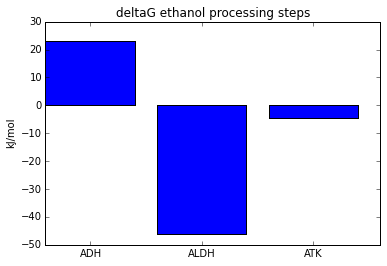

In [7]:
deltaH_EtOH = -1370

# Enthalpy of combustion of ATP
deltaH_ATP = -50
# This is made  regardless of glucose or EtOH

# Difference is in how it is produced. 
# Starting value different, consumables are the same

# Efficiency is defined as inputs required are less for same output.
# Something that is more efficient relative to something else, will 
# require consuming less resources to achieve the same outcome.

deltaG_ADH = 22.9
deltaG_ALDH = -46.0
deltaG_ATK = -4.5
deltaG_EtOH_metabolism = deltaG_ADH + deltaG_ALDH + deltaG_ATK
# formation of Acetyl-CoA
deltaG_EtOH_metabolism = deltaG_ADH + deltaG_ALDH + deltaG_ATK

print "under physiological conditions,"
print "total deltaG of ethanol processing (kJ/mol) = ",deltaG_EtOH_metabolism

N = 3
ind = np.arange(N)
y = (deltaG_ADH,deltaG_ALDH,deltaG_ATK)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG ethanol processing steps')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("ADH","ALDH","ATK"))
plt.show()

under physiological conditions
deltaG of Krebs reactions (kJ/mol) =  -108.96


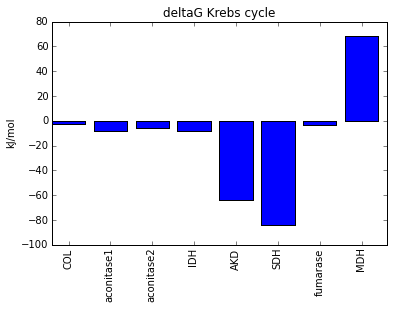

In [47]:
# Gibbs free energy of formation
# all units in kJ/mol

# B. acetyl CoA->citrate->TCA

# TCA:
# Acetate -> citrate -> cis-Aconitate -> Isocitrate -> 
# alpha-ketoglutarate -> fumarate -> malate -> oxaloacetate -> citrate 

# actyl-CoA->citrate (citrate synthase)
# citrate->isocitrate (aka 1-Hydroxypropane-1,2,3-tricarboxylic acid) (aconitase)
# isocitrate->alpha-ketoglutarate (isocitrate dehydrogenase)
# alpha-ketoglutarate->succinyl-CoA (alphta-ketoglutarate dehydrogenase)
# succinyl-CoA->succinate (succinyl-CoA synthetase)
# succinate->fumarate (succinate dehydrogenase)
# fumarate->malate (fumarase)
# malate->oxaloacetate (malate dehydrogenase)

# citric acid (CRC)
deltaG_citrate = -1543.8
# citrate (Miller and Smith-Magowan 1990)
deltaG_isocitrate = -1172.59 
deltaG_alphaketoglut = -801.97
deltaG_succinate = 690.08
deltaG_fumarate = -605.61
deltaG_malate = -846.14
deltaG_oxaloacetate = -798.71

# Gibb energy required for the following Krebs reactions:
# 1. fumarate + H2 -> succinate
deltaG_SDH = -84.43

# 2. fumarate + H20 -> L-malate
deltaG_fumarase = -3.57

# 6. acetate + oxaloacetate -> citrate 
# COL = citrate-oxaloacetate lyase
deltaG_COL = -2.43

# 7. cis-aconitate + H2O -> citrate
deltaG_aconitase1 = -8.49

# 8. isocitrate -> citrate
deltaG_aconitase2 = -6.11

# 9. isocitrate + NADP+ -> alpha-ketoglutarate + NADPH + CO2 (gas)
# IDH = isocitrate dehydrogenase
deltaG_IDH = -8.0

# 12. L-malate + NAD+ -> oxaloacetate + NADH + H+
# MDH = malate dehydrogenase
deltaG_MDH = 68.37

# B. alpha-ketoglutarate + NAD+ + H20 => succinate + NADH + H+ + CO2(g)
# AKD = alpha-ketoglutarate dehydrogenase
deltaG_AKD = -64.3

# steps 7, 8, 9, B, 1, 2, 12, 6 from Miller and Smith-Magowan (1990)ac
# Acetate -> citrate -> cis-Aconitate -> Isocitrate -> 
# alpha-ketoglutarate -> fumarate -> malate -> oxaloacetate -> citrate 

deltaG_Krebs =  deltaG_COL + deltaG_aconitase1 + deltaG_aconitase2 + deltaG_IDH + \
deltaG_AKD + deltaG_SDH + deltaG_fumarase + deltaG_MDH
print "under physiological conditions"
print "deltaG of Krebs reactions (kJ/mol) = ",deltaG_Krebs

N = 8
ind = np.arange(N)
y = (deltaG_COL,deltaG_aconitase1,deltaG_aconitase2,deltaG_IDH,deltaG_AKD,deltaG_SDH,deltaG_fumarase,deltaG_MDH)
fig, ax = plt.subplots()
plot = ax.bar(ind, y, color='b')
ax.set_ylabel('kJ/mol')
ax.set_title('deltaG Krebs cycle')
ax.set_xticks(ind+0.4)
ax.set_xticklabels(("COL","aconitase1","aconitase2","IDH","AKD","SDH","fumarase","MDH"),rotation = 'vertical')
plt.show()
